In [1]:
## Set-up Environment
import os
import sys

# Set project root (assumes notebook is in 'notebooks/' and project is one level up)
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
os.chdir(project_root)

# Add root to Python path for absolute imports like `env.trading_env`
if project_root not in sys.path:
    sys.path.append(project_root)

print("📁 Notebook directory:", notebook_dir)
print("✅ Project root set to:", project_root)


📁 Notebook directory: /workspace/Strategy-PPO-Bots/notebooks
✅ Project root set to: /workspace/Strategy-PPO-Bots


In [2]:
## Check to ensure in the right directory
! pwd

/workspace/Strategy-PPO-Bots


In [3]:
## Upgrade pip
! pip install --upgrade pip

In [4]:
## Install dependencies
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 734.5/734.5 kB 19.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 40.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 21.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 14.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━

In [5]:
## Run integration test script
#! pytest tests/integration/test_integration.py --maxfail=1 --disable-warnings -q

In [5]:
	
## Generate Training Data
! python data_gen/generate_data.py --tickers-file data_gen/tickers.txt --interval 5min --start 2023-01-01 --end 2023-08-31

Fetching NVDA from 2023-01-01 to 2023-08-31 (5 minute)...
Saved NVDA_5minute to data/NVDA_5minute.csv
Fetching NVDA from 2023-01-01 to 2023-08-31 (1 day)...
Saved NVDA_1day to data/NVDA_1day.csv
Fetching NVDA from 2023-01-01 to 2023-08-31 (1 week)...
Saved NVDA_1week to data/NVDA_1week.csv


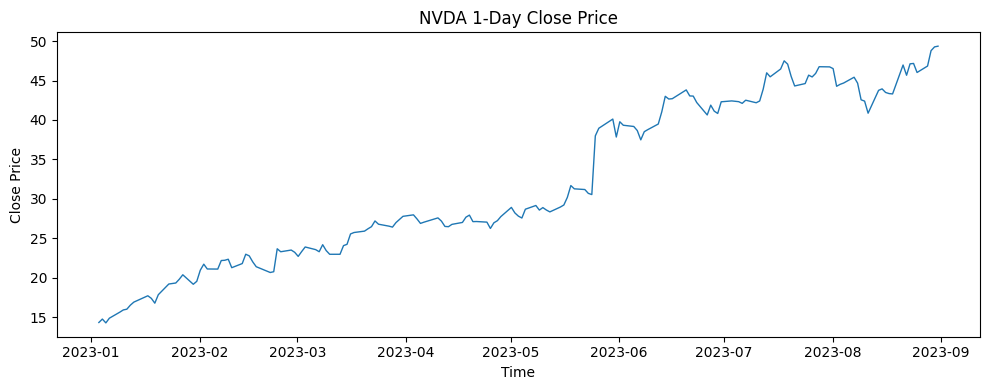

In [6]:
## ─── Plot all 1day CSVs in data/ ─────────────────────────────────────────
import glob
import pandas as pd
import matplotlib.pyplot as plt

# 1. Grab every CSV matching *_1day.csv
csv_files = glob.glob("data/*_1day.csv")
if not csv_files:
    raise FileNotFoundError("No files found: data/*_1day.csv")

# 2. Loop and plot
for file_path in sorted(csv_files):
    # Load and parse time
    df = pd.read_csv(file_path, parse_dates=[0])
    df.set_index(df.columns[0], inplace=True)

    # Extract ticker from filename
    ticker = file_path.split("/")[-1].split("_")[0]

    # Create the figure
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["close"], linewidth=1)
    plt.title(f"{ticker} 1-Day Close Price")
    plt.xlabel("Time")
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()

In [7]:
## Install Shimmy for simulating trading environments
! pip install shimmy


In [9]:
## Run Integration Test for PPO
#%run train/train_ppo.py --test


In [10]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA Available: True
Device: NVIDIA GeForce RTX 4060 Ti


In [1]:
# test

In [11]:
# Run PPO training using files in `data/` directory
%run train/train_ppo.py

[Train] Using NVDA_5minute.csv for NVDA

=== DEBUG START ===
[DEBUG] CONFIG keys: dict_keys(['env', 'features', 'actions', 'rewards', 'training', 'evaluation', 'logging', 'metrics', 'DEBUG'])
[DEBUG] FEATURES in config: [{'type': 'price', 'field': 'close', 'normalize': True, 'method': 'zscore'}, {'type': 'price', 'field': 'volume', 'normalize': True, 'method': 'rolling_zscore', 'window': 20}, {'type': 'indicator', 'field': 'vwap', 'normalize': True, 'method': 'zscore'}, {'type': 'indicator', 'field': 'sma', 'source': 'close', 'window': 14, 'normalize': True, 'method': 'rolling_zscore'}, {'type': 'indicator', 'field': 'ema', 'source': 'volume', 'window': 10, 'normalize': True, 'method': 'minmax'}]
[DEBUG] DataFrame columns: ['timestamp', 'open', 'high', 'low', 'close', 'volume']
[DEBUG] DataFrame dtypes:
 timestamp     object
open         float64
high         float64
low          float64
close        float64
volume       float64
dtype: object
[DEBUG] First few rows:
              timest

/workspace/Strategy-PPO-Bots/env/feature_engineering.py:96: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[name].fillna(method="ffill").fillna(0)
/workspace/Strategy-PPO-Bots/env/feature_engineering.py:96: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[name].fillna(method="ffill").fillna(0)
/workspace/Strategy-PPO-Bots/env/feature_engineering.py:96: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = df[name].fillna(method="ffill").fillna(0)
/opt/conda/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environ

[Callback] Rollout finished at step 2048, Avg Reward: -0.0081, Max Reward: -0.0081
-----------------------------
| time/              |      |
|    fps             | 205  |
|    iterations      | 1    |
|    time_elapsed    | 9    |
|    total_timesteps | 2048 |
-----------------------------
[Callback] Rollout finished at step 4096, Avg Reward: -0.1251, Max Reward: -0.1251
-----------------------------------------
| time/                   |             |
|    fps                  | 119         |
|    iterations           | 2           |
|    time_elapsed         | 34          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010353172 |
|    clip_fraction        | 0.0593      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -2.63       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.249      |
|    n_updates            | 10      

/opt/conda/lib/python3.10/site-packages/stable_baselines3/common/save_util.py:284: UserWarning: Path 'models' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


In [ ]:
! ls ../debug_rewards.log


ls: cannot access '../debug_rewards.log': No such file or directory
